In [2]:
import urllib.request
from PIL import Image

In [2]:
img_orange = Image.open("shot_orange_marilyn.png")

In [3]:
img_orange = Image.open(r"marilyn_orange.png")
#img_orange.show()

img_red = Image.open(r"marilyn_red.png")
#img_red.show()

img_turq = Image.open(r"marilyn_turq.png")
#img_turq.show()

img_blue = Image.open(r"marilyn_blue.jpg")
#img_blue.show()

img_eggblue = Image.open(r"marilyn_eggblue.png")
#img_eggblue.show()

In [75]:

import skimage.measure    
skimage.measure.shannon_entropy(img_red)

6.09010793872382

In [8]:
# All Import Statements Defined Here
# Note: Do not change anything

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.image import imread

from numpy.linalg import svd
from sklearn.decomposition import PCA
import os
from sklearn.datasets import load_digits

#%matplotlib inline

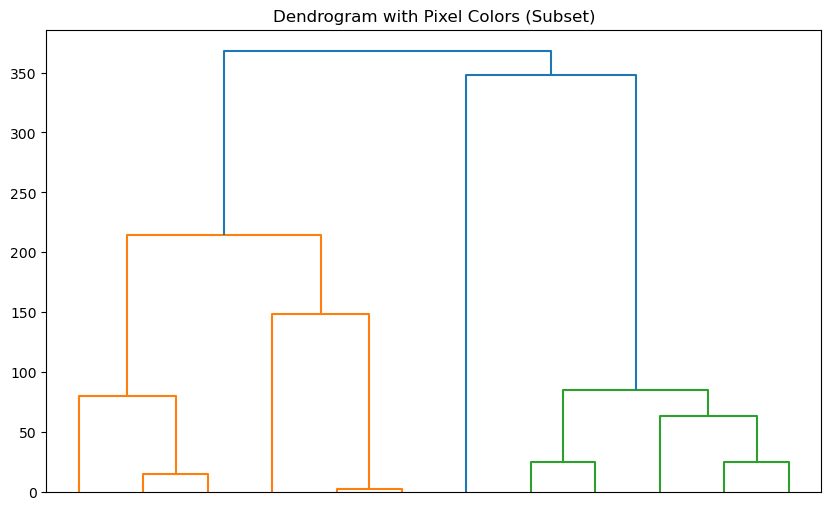

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from PIL import Image

# Load the image
#image_path = 'path/to/your/image.jpg'
#image = Image.open(image_path)

# Convert image to numpy array
pixels = np.array(img_orange)

# Reshape the array to a 2D representation of pixels (rows = pixels, columns = RGB values)
pixels_2d = pixels.reshape(-1, 3)

total_pixels = len(pixels_2d)
subset_size = total_pixels // 100000  # One third of the pixels
subset_indices = np.random.choice(total_pixels, size=subset_size, replace=False)
subset_pixels = pixels_2d[subset_indices]

# Perform hierarchical clustering on the pixel colors
linked = linkage(subset_pixels, 'ward')

# Plot the dendrogram with color labels
plt.figure(figsize=(10, 6))
dendrogram(linked, no_labels=True)

# Add color labels under each branch
color_labels = [tuple(pixels_2d[i]) for i in subset_indices]
ax = plt.gca()
x_labels = ax.get_xmajorticklabels()
for i, label in enumerate(x_labels):
    label.set_color(color_labels[i] / 255)  # Normalize colors to the range [0, 1]

plt.title('Dendrogram with Pixel Colors (Subset)')
plt.show()


In [20]:
color_labels

[(84, 255, 227),
 (255, 227, 123),
 (226, 171, 185),
 (193, 89, 255),
 (255, 227, 123),
 (96, 255, 237),
 (173, 185, 255),
 (255, 227, 171),
 (189, 255, 227),
 (84, 255, 227),
 (255, 227, 123),
 (99, 255, 244)]

In [33]:
pixels.shape

(960, 960, 4)

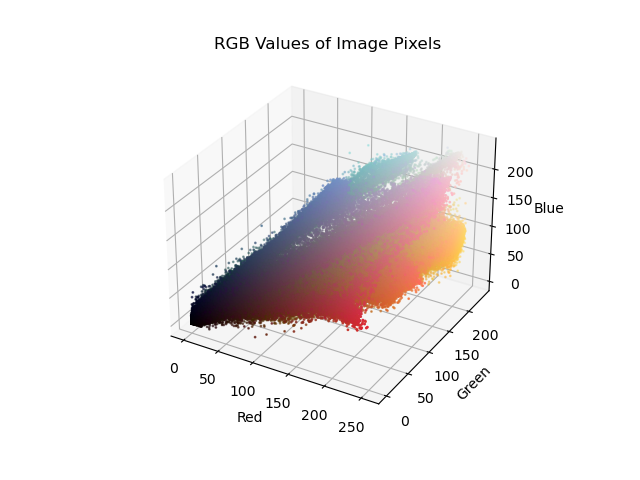

In [58]:
import matplotlib.pyplot as plt
#import ipympl
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

# Load the image
#image_path = ''  # Replace with the actual image path
image = img_orange

# Convert the image to a NumPy array
image_array = np.array(image)

# Reshape the array to have the shape (num_pixels, 3)
num_pixels = image_array.shape[0] * image_array.shape[1]
image_array_reshaped = image_array.reshape(num_pixels, 4)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the RGB values
r = image_array_reshaped[:, 0]
g = image_array_reshaped[:, 1]
b = image_array_reshaped[:, 2]

# Plot the RGB values in 3D space
ax.scatter(r, g, b, c=image_array_reshaped / 255.0, s=1)

# Set labels and title
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('RGB Values of Image Pixels')

# Show the plot
plt.show()


In [10]:
cmyk = Image.open('marilyn_red.tif')
array = np.array(cmyk)
array.shape

(960, 960, 4)

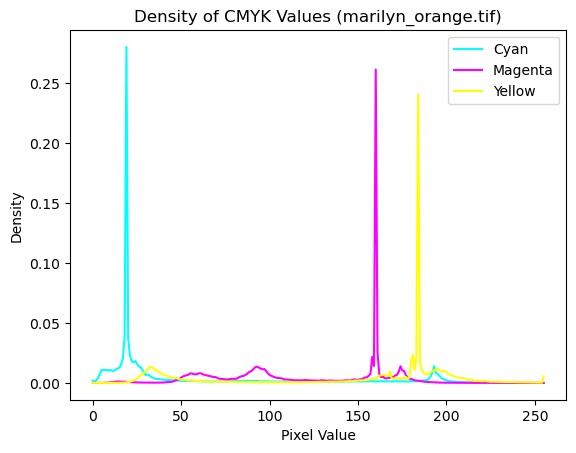

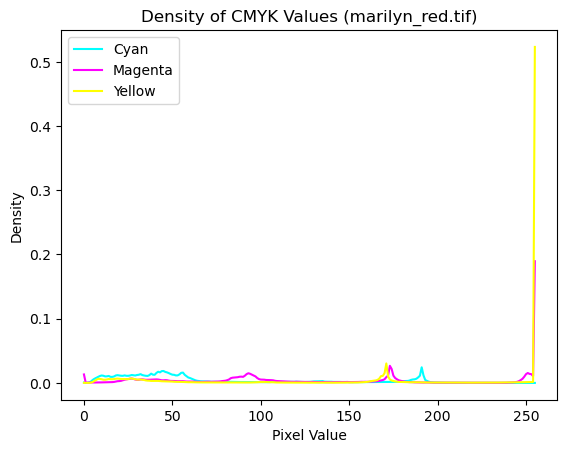

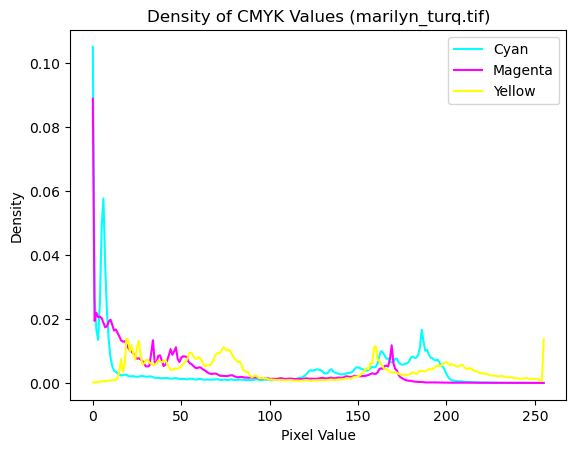

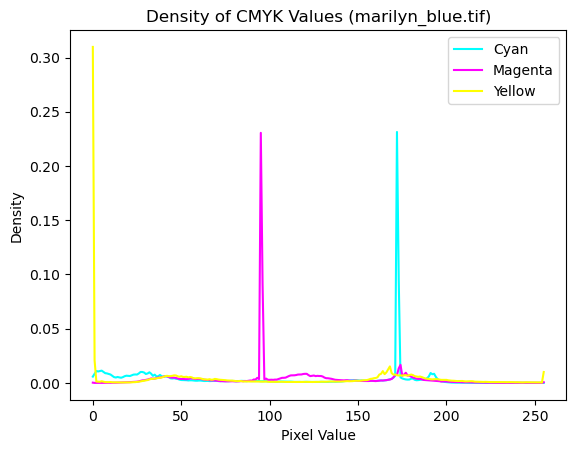

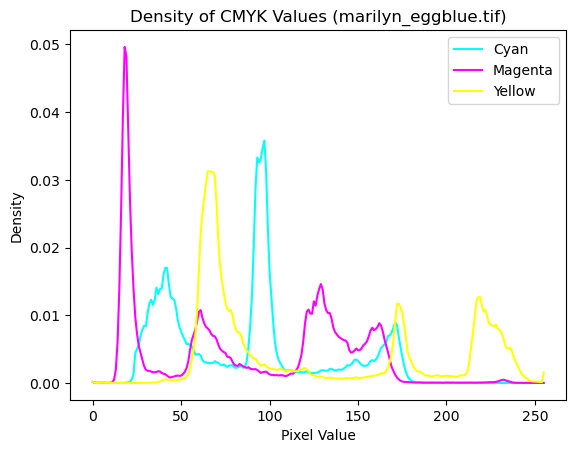

In [18]:
def plot_color_density_cmyk(image_path):
    # Load the image
    image = Image.open(image_path)

    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Get the red and blue color channels
    cyan_values = image_array[:, :, 0]
    magenta_values = image_array[:, :, 1]
    yellow_values = image_array[:, :, 2]
    #black_values = image_array[:, :, 3]

    # Calculate the density for red and blue color channels
    cyan_density = np.histogram(cyan_values.flatten(), bins=256, range=(0, 256), density=True)[0]
    magenta_density = np.histogram(magenta_values.flatten(), bins=256, range=(0, 256), density=True)[0]
    yellow_density = np.histogram(yellow_values.flatten(), bins=256, range=(0, 256), density=True)[0]
    #black_density = np.histogram(black_values.flatten(), bins=256, range=(0, 256), density=True)[0]

    # Create the figure and axis
    fig, ax = plt.subplots()

    # Plot the density for red and blue on the same axis
    ax.plot(cyan_density, color='cyan', label='Cyan')
    ax.plot(magenta_density, color='magenta', label='Magenta')
    ax.plot(yellow_density, color='yellow', label='Yellow')
    #ax.plot(black_density, color='black', label='Black')

    # Set labels and title
    ax.set_xlabel('Pixel Value')
    ax.set_ylabel('Density')
    ax.set_title('Density of CMYK Values (' + image_path + ')')

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()


path_dict_cmyk = {
    'orange' : "marilyn_orange.tif",
    'red' : "marilyn_red.tif",
    'turq' : "marilyn_turq.tif",
    'blue' : "marilyn_blue.tif",
    'eggblue' : "marilyn_eggblue.tif",
}
for path in path_dict_cmyk.values():
    plot_color_density_cmyk(path)

In [ ]:
def plot_color_density_cmyk_array(image_array)

    # Get the red and blue color channels
    cyan_values = image_array[:, :, 0]
    magenta_values = image_array[:, :, 1]
    yellow_values = image_array[:, :, 2]
    #black_values = image_array[:, :, 3]

    # Calculate the density for red and blue color channels
    cyan_density = np.histogram(cyan_values.flatten(), bins=256, range=(0, 256), density=True)[0]
    magenta_density = np.histogram(magenta_values.flatten(), bins=256, range=(0, 256), density=True)[0]
    yellow_density = np.histogram(yellow_values.flatten(), bins=256, range=(0, 256), density=True)[0]
    #black_density = np.histogram(black_values.flatten(), bins=256, range=(0, 256), density=True)[0]

    # Create the figure and axis
    fig, ax = plt.subplots()

    # Plot the density for red and blue on the same axis
    ax.plot(cyan_density, color='cyan', label='Cyan')
    ax.plot(magenta_density, color='magenta', label='Magenta')
    ax.plot(yellow_density, color='yellow', label='Yellow')
    #ax.plot(black_density, color='black', label='Black')

    # Set labels and title
    ax.set_xlabel('Pixel Value')
    ax.set_ylabel('Density')
    ax.set_title('Density of CMYK Values (' + image_path + ')')

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()


_dict_cmyk = {
    'orange' : "marilyn_orange.tif",
}
for path in path_dict_cmyk.values():
    plot_color_density_cmyk(path)

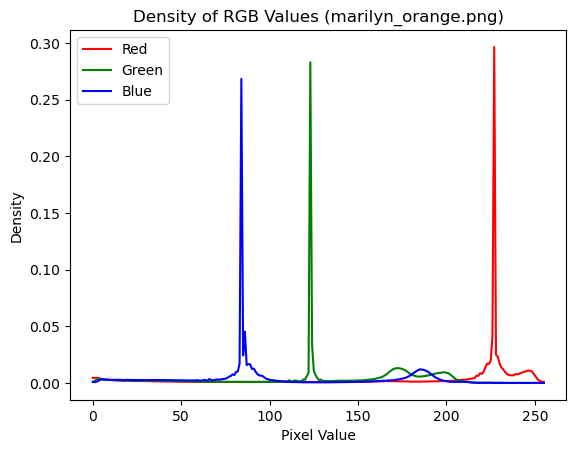

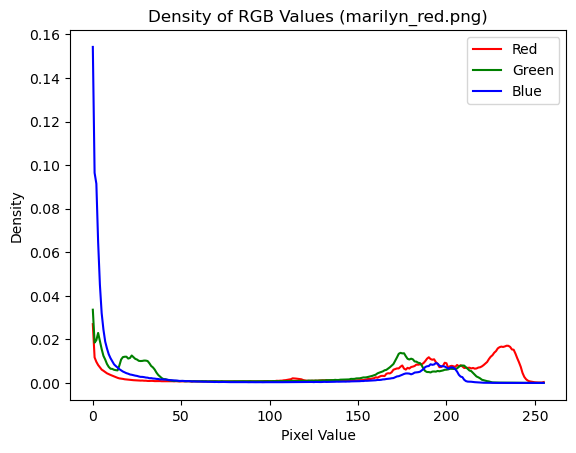

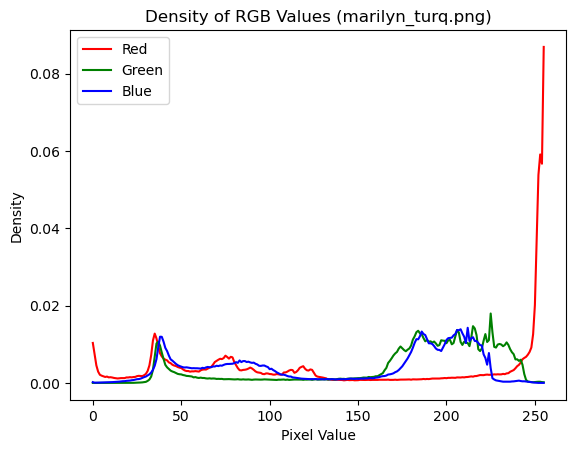

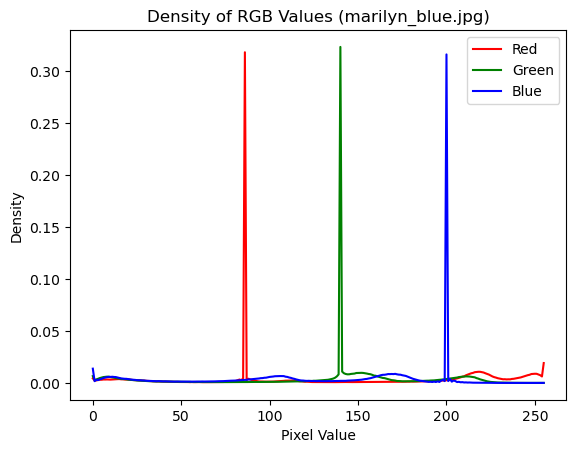

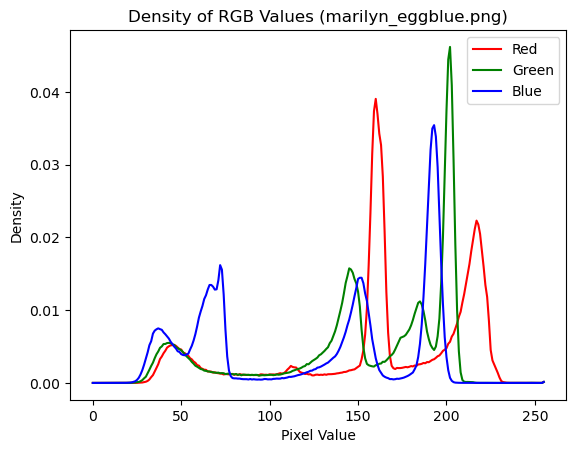

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def plot_color_density(image_path):
    # Load the image
    image = Image.open(image_path)

    # Convert the image to RGB if it's a PNG with transparency
    if image.mode == 'RGBA':
        image = image.convert('RGB')

    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Get the red and blue color channels
    red_values = image_array[:, :, 0]
    green_values = image_array[:, :, 1]
    blue_values = image_array[:, :, 2]

    # Calculate the density for red and blue color channels
    red_density = np.histogram(red_values.flatten(), bins=256, range=(0, 256), density=True)[0]
    green_density = np.histogram(green_values.flatten(), bins=256, range=(0, 256), density=True)[0]
    blue_density = np.histogram(blue_values.flatten(), bins=256, range=(0, 256), density=True)[0]

    # Create the figure and axis
    fig, ax = plt.subplots()

    # Plot the density for red and blue on the same axis
    ax.plot(red_density, color='red', label='Red')
    ax.plot(green_density, color='green', label='Green')
    ax.plot(blue_density, color='blue', label='Blue')

    # Set labels and title
    ax.set_xlabel('Pixel Value')
    ax.set_ylabel('Density')
    ax.set_title('Density of RGB Values (' + image_path + ')')

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()


path_dict = {
    'orange' : "marilyn_orange.png",
    'red' : "marilyn_red.png",
    'turq' : "marilyn_turq.png",
    'blue' : "marilyn_blue.jpg",
    'eggblue' : "marilyn_eggblue.png",
}
for path in path_dict.values():
    plot_color_density(path)


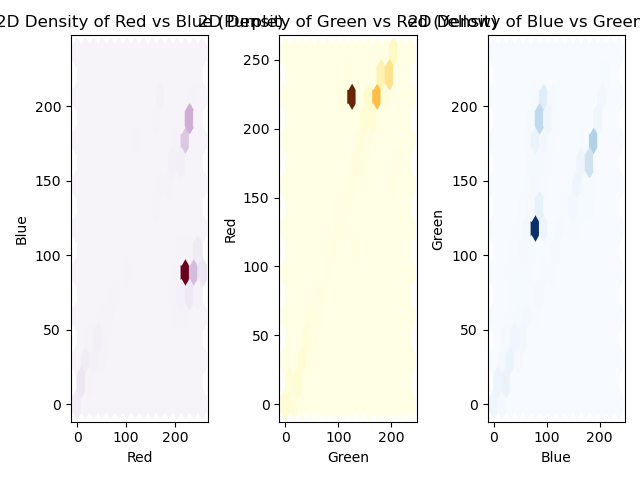

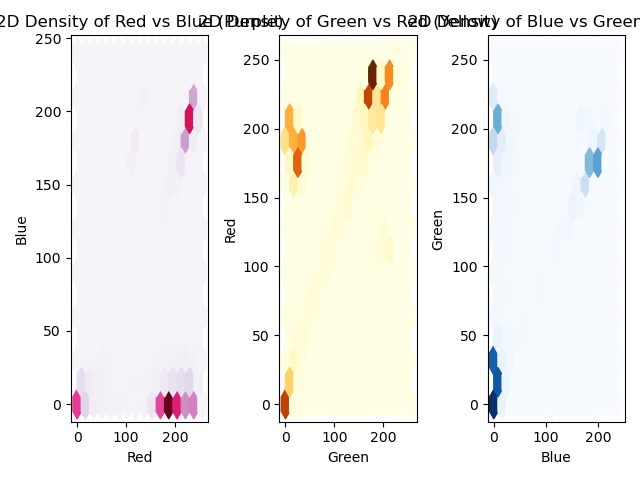

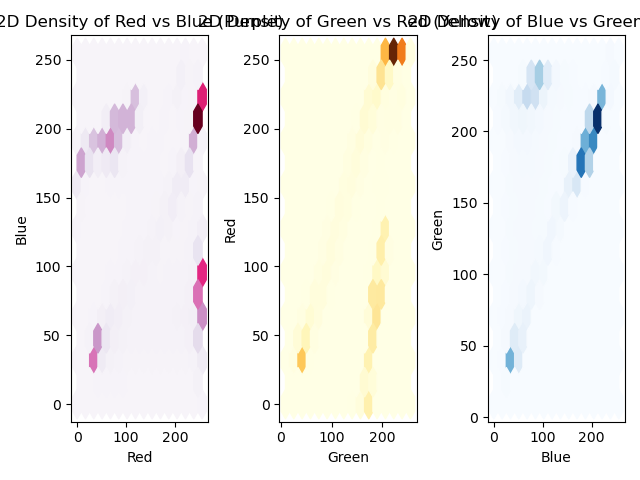

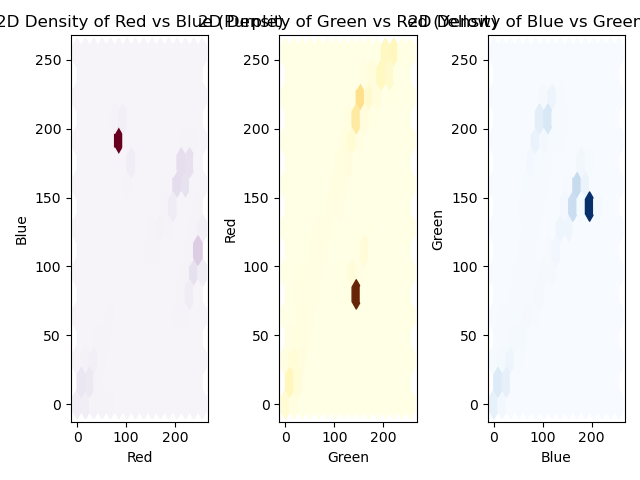

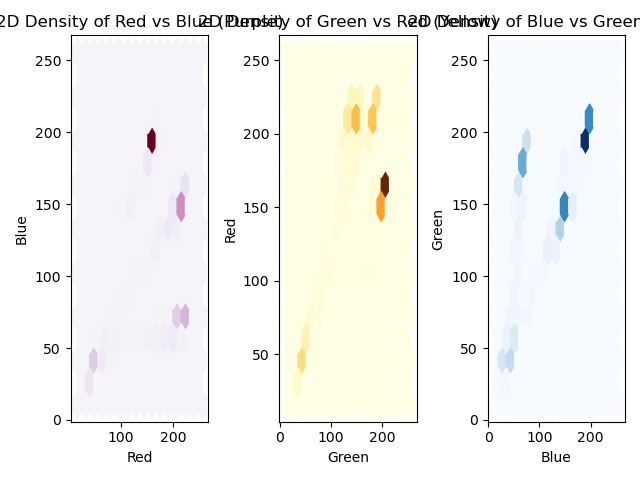

In [101]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def plot_color_densities(image_path):
    # Load the image
    image = Image.open(image_path)

    # Convert the image to RGB if it's a PNG with transparency
    if image.mode == 'RGBA':
        image = image.convert('RGB')

    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Get the red, green, and blue color channels
    red_values = image_array[:, :, 0]
    green_values = image_array[:, :, 1]
    blue_values = image_array[:, :, 2]

    # Create the figure and subplots
    fig, axs = plt.subplots(1, 3)

    # Plot the density for red vs blue               (gridsize=256)
    axs[0].hexbin(red_values.flatten(), blue_values.flatten(), gridsize=15, cmap='PuRd')
    axs[0].set_xlabel('Red')
    axs[0].set_ylabel('Blue')
    axs[0].set_title('2D Density of Red vs Blue (Purple)')

    # Plot the density for green vs red
    axs[1].hexbin(green_values.flatten(), red_values.flatten(), gridsize=15, cmap='YlOrBr')
    axs[1].set_xlabel('Green')
    axs[1].set_ylabel('Red')
    axs[1].set_title('2D Density of Green vs Red (Yellow)')

    # Plot the density for blue vs green
    axs[2].hexbin(blue_values.flatten(), green_values.flatten(), gridsize=15, cmap='Blues')
    axs[2].set_xlabel('Blue')
    axs[2].set_ylabel('Green')
    axs[2].set_title('2D Density of Blue vs Green (Cyan)')

    # Add colorbars
    #cbar0 = plt.colorbar(axs[0].collections[0], ax=axs[0], label='Density')
    #cbar1 = plt.colorbar(axs[1].collections[0], ax=axs[1], label='Density')
    #cbar2 = plt.colorbar(axs[2].collections[0], ax=axs[2], label='Density')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
path_dict = {
    'orange' : "marilyn_orange.png",
    'red' : "marilyn_red.png",
    'turq' : "marilyn_turq.png",
    'blue' : "marilyn_blue.jpg",
    'eggblue' : "marilyn_eggblue.png",
}
for path in path_dict.values():
    plot_color_densities(path)

